In [1]:
##ML Assignment, Ivan Tomaš, s2046587

In [244]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import f_regression
from scipy.stats import moment
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import time
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_classif

In [245]:
df_pandas = pd.read_csv(r'C:\Users\Ivan\Desktop\2046587\2046587_mocap.csv', index_col = 0)

In [246]:
#1.2 Number of istances and index number
df_pandas['Class'].value_counts()

5    1574
2    1498
4    1478
Name: Class, dtype: int64

In [247]:
df_pandas.describe()

,Class,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11
count,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,...,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000
mean,3.687473,50.567045,48.289262,46.585344,46.919613,46.082052,46.340751,46.567293,47.007699,48.478136,...,-20.041574,-20.996858,-21.326955,-23.673232,-25.128041,-26.466507,-30.683386,-32.975058,-33.935573,-33.944274
std,1.251211,32.857361,33.946589,34.761569,35.501509,35.856570,35.601642,35.421412,36.271887,36.964951,...,35.555098,35.617810,36.069439,36.689074,36.431661,35.711270,35.917804,34.825834,35.176122,35.173307
min,2.000000,-80.055457,-99.868296,-97.281171,-82.844234,-97.434260,-84.906559,-84.906559,-84.906559,-84.906559,...,-119.265680,-110.801049,-156.339072,-114.041209,-111.945561,-113.733105,-142.654497,-142.654497,-142.654497,-142.654497
25%,2.000000,29.330945,25.318999,20.878274,20.636343,18.312252,19.094655,19.712873,17.475945,19.448090,...,-45.379637,-48.966404,-49.566434,-54.113659,-55.538579,-55.473682,-59.430965,-59.759128,-60.389594,-60.389594
50%,4.000000,53.976036,52.815236,50.878706,51.280332,50.622150,50.530867,51.641680,52.796577,55.579630,...,-16.132684,-17.095681,-18.548876,-21.566235,-22.927171,-25.544890,-30.299256,-33.583539,-35.695434,-35.733645
75%,5.000000,73.154200,72.077619,70.417146,71.734534,71.640398,72.105842,72.135909,74.389402,77.636293,...,7.582942,7.736352,6.879549,5.900238,4.329499,2.315769,-0.919057,-6.210956,-8.047515,-8.047515
max,5.000000,154.536044,137.930247,143.941267,150.629228,152.161126,148.448612,176.409004,148.448612,172.039246,...,103.290381,103.043397,112.110711,102.686314,117.914907,111.084692,119.213101,111.084692,111.084692,111.084692


In [248]:
index_2 = []
index_4 = []
index_5 = []

for i in np.arange(0, len(df_pandas['Class']),1):
    if df_pandas['Class'][i] == 2:
        index_2.append(i)
    if df_pandas['Class'][i] == 4:
        index_4.append(i)
    if df_pandas['Class'][i] == 5:
        index_5.append(i)
        
print("Some idex values that belong to class 2\n ", index_2[0:10])
print("Some index values that belong to class 4:\n ", index_4[0:10])
print("Some index values that belong to class 5:\n ", index_5[0:10])
print("I display just first 10 values instead of whole matrix")
print("Now I can use index 0 for class 2, index 150 for class 4 and index 328 for class5")

Some idex values that belong to class 2
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Some index values that belong to class 4:
  [150, 151, 152, 153, 154, 155, 156, 157, 158, 159]
Some index values that belong to class 5:
  [328, 329, 330, 331, 332, 333, 334, 335, 336, 337]
I display just first 10 values instead of whole matrix
Now I can use index 0 for class 2, index 150 for class 4 and index 328 for class5


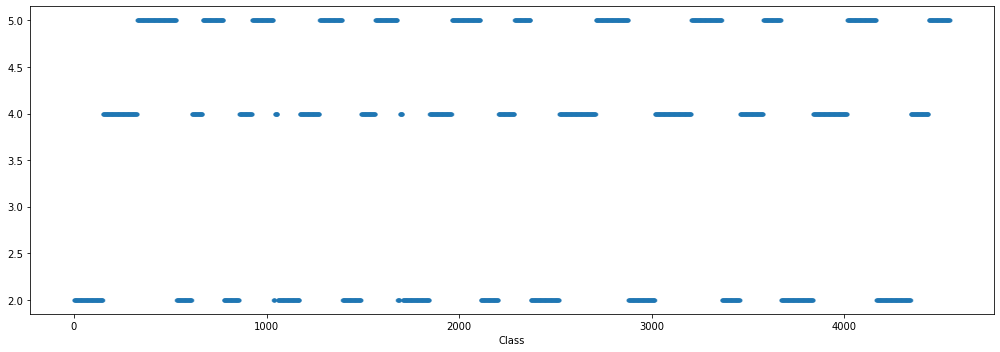

In [249]:
fig, ax = plt.subplots(1, 1, figsize=[14,5])
df_pandas['Class'].plot(style='.', ax=ax, alpha=0.5)
ax.set_xlabel('index')
ax.set_xlabel('Class')
fig.tight_layout()

In [250]:
df = np.array(df_pandas)
print(df[0,0])   #in 0th column classification is 2
print(df[150,0]) #in 150th column classification is 4
print(df[328,0]) # in 328th column classification is 5

x_values_2 = df[752, 1:13]
y_values_2 = df[752, 13:25]
z_values_2 = df[752, 25:37]

x_values_4 = df[150, 1:13]
y_values_4 = df[150, 13:25]
z_values_4 = df[150, 25:37]

x_values_5 = df[328, 1:13]
y_values_5 = df[328, 13:25]
z_values_5 = df[328, 25:37]

2.0
4.0
5.0


## Visualization

Text(0.5, 0.92, 'Class 5, X VS Y VS Z')

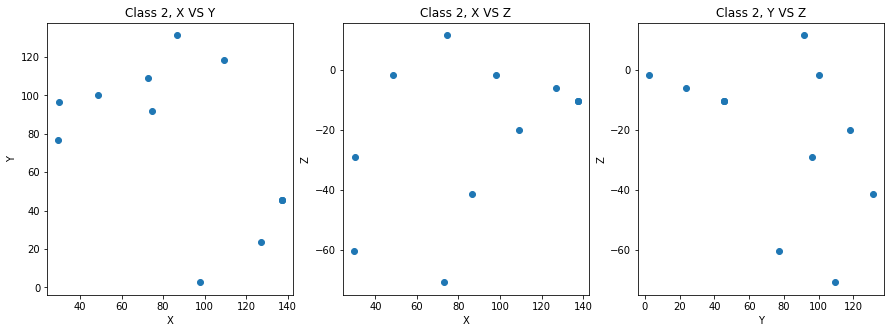

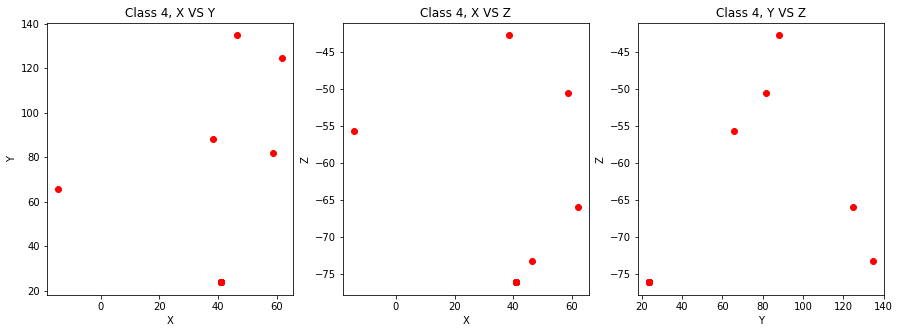

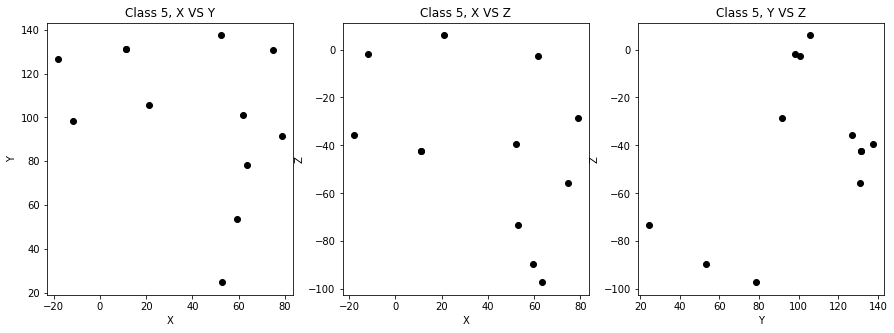

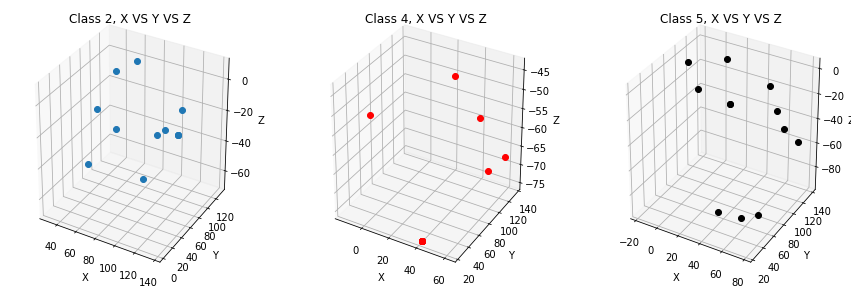

In [251]:
fig, axes = plt.subplots(1,3, figsize = (15,5))
axes[0].plot(x_values_2, y_values_2, 'o')
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_title("Class 2, X VS Y")

axes[1].plot(x_values_2, z_values_2, 'o')
axes[1].set_xlabel("X")
axes[1].set_ylabel("Z")
axes[1].set_title("Class 2, X VS Z")

axes[2].plot(y_values_2, z_values_2, 'o')
axes[2].set_xlabel("Y")
axes[2].set_ylabel("Z")
axes[2].set_title("Class 2, Y VS Z")


fig, axes = plt.subplots(1,3, figsize = (15,5))
axes[0].plot(x_values_4, y_values_4, 'ro')
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_title("Class 4, X VS Y")

axes[1].plot(x_values_4, z_values_4, 'ro')
axes[1].set_xlabel("X")
axes[1].set_ylabel("Z")
axes[1].set_title("Class 4, X VS Z")

axes[2].plot(y_values_4, z_values_4, 'ro')
axes[2].set_xlabel("Y")
axes[2].set_ylabel("Z")
axes[2].set_title("Class 4, Y VS Z")


fig, axes = plt.subplots(1,3, figsize = (15,5))
axes[0].plot(x_values_5, y_values_5, 'ko')
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].set_title("Class 5, X VS Y")

axes[1].plot(x_values_5, z_values_5, 'ko')
axes[1].set_xlabel("X")
axes[1].set_ylabel("Z")
axes[1].set_title("Class 5, X VS Z")

axes[2].plot(y_values_5, z_values_5, 'ko')
axes[2].set_xlabel("Y")
axes[2].set_ylabel("Z")
axes[2].set_title("Class 5, Y VS Z")

fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,3,1, projection = '3d')
plt.plot(x_values_2, y_values_2, z_values_2, 'o')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Class 2, X VS Y VS Z")

ax = fig.add_subplot(1,3,2, projection = '3d')
plt.plot(x_values_4, y_values_4, z_values_4, 'ro')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Class 4, X VS Y VS Z")

ax = fig.add_subplot(1,3,3, projection = '3d')
plt.plot(x_values_5, y_values_5, z_values_5, 'ko')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Class 5, X VS Y VS Z")


## Baseline classifier without any pre-processing and feature engineering

In [252]:
y = df[:,0]
X = df[:, 1:37]

In [253]:
#Logistic regression without cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)
start = time.time()
logreg = LogisticRegression(max_iter = 10000)
lr_without_cv = logreg.fit(X_train, y_train)
end = time.time()
print("Logistic regression accurancy without cross-validation: {:.2f}".format(lr_without_cv.score(X_test, y_test)))
print('Time: {:.2f}'.format(end - start))
pred = lr_without_cv.predict(X_test)
print(classification_report(y_test, pred))

Logistic regression accurancy without cross-validation: 0.80
Time: 1.77
              precision    recall  f1-score   support

         2.0       0.84      0.89      0.87       375
         4.0       0.78      0.75      0.77       369
         5.0       0.77      0.76      0.76       394

    accuracy                           0.80      1138
   macro avg       0.80      0.80      0.80      1138
weighted avg       0.80      0.80      0.80      1138



Since I stratify the data and data itself is already balanced enough, already the good metric for evaluating the result is accurancy. 
The best precision and recall score is obtained with class 2, indicating good predictable proparties for class 2.
The worst performance is in class 5, based on the f1-score

In [254]:
#Logistic regression with cross-validation
start = time.time()
logreg = LogisticRegression(max_iter = 10000)
scores = cross_val_score(logreg, X, y, cv = 5)
end = time.time()
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation scores: {:.2f}".format(scores.mean()))
print("Time: {:.2f}".format(end - start))

Cross-validation scores: [0.54505495 0.68901099 0.83626374 0.7967033  0.81538462]
Average cross-validation scores: 0.74
Time: 21.20


We can notice big difference in accurancy depending on which training data we use

Train accurancy with grid search: 0.79
Best parameter: {'C': 100, 'multi_class': 'ovr'}
Accurancy on test: 0.80

Time: 53.82


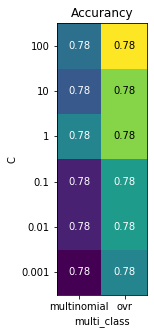

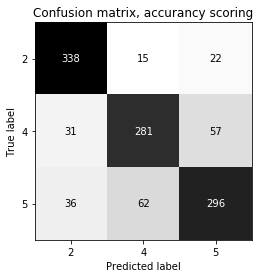

In [255]:
#Best hyperparameters in logistic regression
start = time.time()
logreg = LogisticRegression(max_iter = 10000, solver = 'lbfgs')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'multi_class' : ['multinomial', 'ovr']}
grid_search = GridSearchCV(logreg, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(6,2)
end = time.time()

plt.figure(figsize=(8,5))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'multi_class', ylabel = 'C', xticklabels = param_grid['multi_class'], yticklabels = param_grid['C'], cmap = 'viridis')
plt.title("Accurancy")

print("Train accurancy with grid search: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

The analysis so far is done without any feature engineering or pre-processing, since assignment didn't ask to perform it on this part of the exercise. From now I, I will start with the feature engineering and proceed with pre-processing the data and based on that I will learn week learners to classify the data set. Based on the week learners, I will create ensamble learning algorithms to beat the weak learners on test set.

## Feature engineering

In [256]:
#Preprocess the data
y = df[:,0]
X_start = df[:, 1:37]
X_step1 = np.delete(X_start, [11, 23, 35], 1)

In [257]:
df_pandas[df_pandas.columns[-4:]]

,Z8,Z9,Z10,Z11
0,34.564879,3.058732,31.013109,31.013109
1,0.409612,-7.184735,31.996609,31.996609
2,32.242654,0.748473,22.625334,22.625334
3,10.347274,-71.369739,2.385157,2.385157
4,23.518965,33.831001,-6.378270,-6.378270
...,...,...,...,...
4545,-45.009733,-59.714393,-59.714393,-59.714393
4546,-30.794524,8.794772,8.794772,8.794772
4547,-54.725521,-60.389317,-60.389317,-60.389317
4548,-54.077362,-42.264726,-42.264726,-42.264726


In [258]:
df_pandas[df_pandas.columns[9:13]]

,X8,X9,X10,X11
0,49.684712,93.234160,12.985994,12.985994
1,92.200877,79.210411,48.908908,48.908908
2,49.025965,92.655689,35.283681,35.283681
3,62.125422,80.093745,92.766147,92.766147
4,35.508011,49.472569,79.256011,79.256011
...,...,...,...,...
4545,-1.392768,87.069857,87.069857,87.069857
4546,26.496248,29.449912,29.449912,29.449912
4547,-21.027704,89.110072,89.110072,89.110072
4548,-21.578233,-2.014254,-2.014254,-2.014254


In [259]:
df_pandas[df_pandas.columns[21:25]]

,Y8,Y9,Y10,Y11
0,153.665720,136.861851,94.428719,94.428719
1,137.105045,93.743155,154.220134,154.220134
2,154.177672,137.152688,99.448373,99.448373
3,98.268837,55.146623,136.967775,136.967775
4,98.932699,153.452787,93.432859,93.432859
...,...,...,...,...
4545,123.495531,62.011226,62.011226,62.011226
4546,137.016662,106.294023,106.294023,106.294023
4547,104.201645,61.098743,61.098743,61.098743
4548,104.592488,124.598186,124.598186,124.598186


It can be seen that last two observations in each class seems to be the same. To prove it I will do more indepth analysis presented below

In [260]:
X_2 = np.zeros((len(index_2), 12))
Y_2 = np.zeros((len(index_2), 12))
Z_2 = np.zeros((len(index_2), 12))
k = 0
for i in index_2:
    for j in np.arange(0,12,1):
        X_2[k, j] = X_start[i,j]
        Y_2[k, j] = X_start[i, j + 12]
        Z_2[k, j] = X_start[i, j + 24]
    
    k = k + 1

X_4 = np.zeros((len(index_4), 12))
Y_4 = np.zeros((len(index_4), 12))
Z_4 = np.zeros((len(index_4), 12))
k = 0
for i in index_4:
    for j in np.arange(0,12,1):
        X_4[k, j] = X_start[i,j]
        Y_4[k, j] = X_start[i, j + 12]
        Z_4[k, j] = X_start[i, j + 24]
    
    k = k + 1
    
X_5 = np.zeros((len(index_5), 12))
Y_5 = np.zeros((len(index_5), 12))
Z_5 = np.zeros((len(index_5), 12))
k = 0
for i in index_5:
    for j in np.arange(0,12,1):
        X_5[k, j] = X_start[i,j]
        Y_5[k, j] = X_start[i, j + 12]
        Z_5[k, j] = X_start[i, j + 24]
    
    k = k + 1

In [261]:
print("Shape of X, Y and Z for class 2: {}".format(np.shape(X_2)))
print("Shape of X, Y and Z for class 4: {}".format(np.shape(X_4)))
print("Shape of X, Y and Z for calss 5: {}".format(np.shape(X_5)))

k = 0
special_i_1 = []
for i in np.arange(0,len(X_2),1):
    if (X_2[i,10] == X_2[i,11]) & (Y_2[i,10] == Y_2[i,11]) & (Z_2[i,10] == Z_2[i,11]):
        k = k + 1
    else:
        special_i_1.append(i)
        
print("\nNumber of observations in class 2 with same 2 last values: ", k)
print("Row in which they are not equal: {}".format(special_i_1))

k = 0
special_i_2 = []
for i in np.arange(0, len(X_4),1):
    if (X_4[i,11] == X_4[i,10] == X_4[i,9] == X_4[i,8]) & (Y_4[i,11] == Y_4[i,10] == Y_4[i,9] == Y_4[i,8]) & (Z_4[i,11] == Z_4[i,10] == Z_4[i,9] == Z_4[i,8]):
        k = k + 1
    else:
        special_i_2.append(i)
print("\nNumber of observations in class 4 with same last 4 values: {}".format(k))
print("Row in which they are not equal: {}".format(special_i_2))

k = 0
special_i_3 = []
for i in np.arange(0,len(X_5),1):
    if (X_5[i,10] == X_5[i,11]) & (Y_5[i,10] == Y_5[i,11]) & (Z_5[i,10] == Z_5[i,11]):
        k = k + 1
    else:
        special_i_3.append(i)

print("\nNumber of observations in class 5 with same last 5 values: {}".format(k))
print("Row in which they are not equal: {}".format(special_i_3))

Shape of X, Y and Z for class 2: (1498, 12)
Shape of X, Y and Z for class 4: (1478, 12)
Shape of X, Y and Z for calss 5: (1574, 12)

Number of observations in class 2 with same 2 last values:  1495
Row in which they are not equal: [752, 1119, 1120]

Number of observations in class 4 with same last 4 values: 1477
Row in which they are not equal: [674]

Number of observations in class 5 with same last 5 values: 1574
Row in which they are not equal: []


It can be concluded that for only 4 observations last two values are not unique. It is hard to believe that 4 observations, out of 4550, will bring any extra explanatory value so I decided to remove last column of X, Y and Z in order to reduce 3 dimensions and, hopefully, gain better performance of ML algorithms and faster run time.

Text(0.5, 1.0, 'Feature selection')

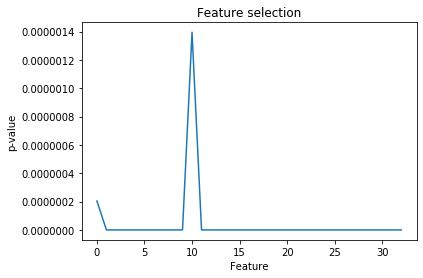

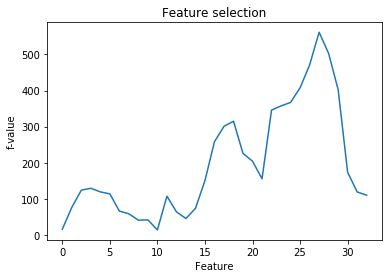

In [262]:
f_values, p_values = f_classif(X_step1, y)
plt.figure()
plt.plot(p_values)
plt.xlabel("Feature")
plt.ylabel("p-value")
plt.title("Feature selection")

plt.figure()
plt.plot(f_values)
plt.xlabel("Feature")
plt.ylabel("f-value")
plt.title("Feature selection")


Since non of the features don't have insignificant p-values, I decided not to kick out any feature from the dataset!

In [263]:
#Final X
X = X_step1
np.shape(X)

(4550, 33)

Train accurancy with grid search: 0.79
Best parameter: {'C': 0.01, 'multi_class': 'ovr'}
Accurancy on test: 0.80

Time: 14.71


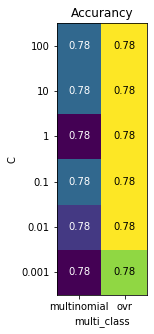

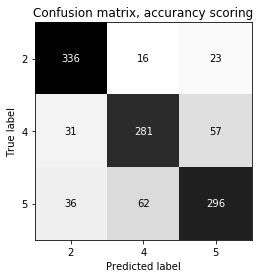

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)
start = time.time()
logreg = LogisticRegression(max_iter = 10000, solver = 'lbfgs')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'multi_class' : ['multinomial', 'ovr']}
grid_search = GridSearchCV(logreg, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(6,2)
end = time.time()

plt.figure(figsize=(8,5))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'multi_class', ylabel = 'C', xticklabels = param_grid['multi_class'], yticklabels = param_grid['C'], cmap = 'viridis')
plt.title("Accurancy")

print("Train accurancy with grid search: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()



In [265]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         2.0       0.83      0.90      0.86       375
         4.0       0.78      0.76      0.77       369
         5.0       0.79      0.75      0.77       394

    accuracy                           0.80      1138
   macro avg       0.80      0.80      0.80      1138
weighted avg       0.80      0.80      0.80      1138



The actual accuracy and didn't change significantly after the feature engineering might indicate that logistic regression is not sensitive to feature selection in this data set. Furthermore, we again notice that train result for grid search is almost not different no matter what level of C or with multi_class do I use. Now, let's see if it is the case also after pre-processing the data.

## Pre-processing

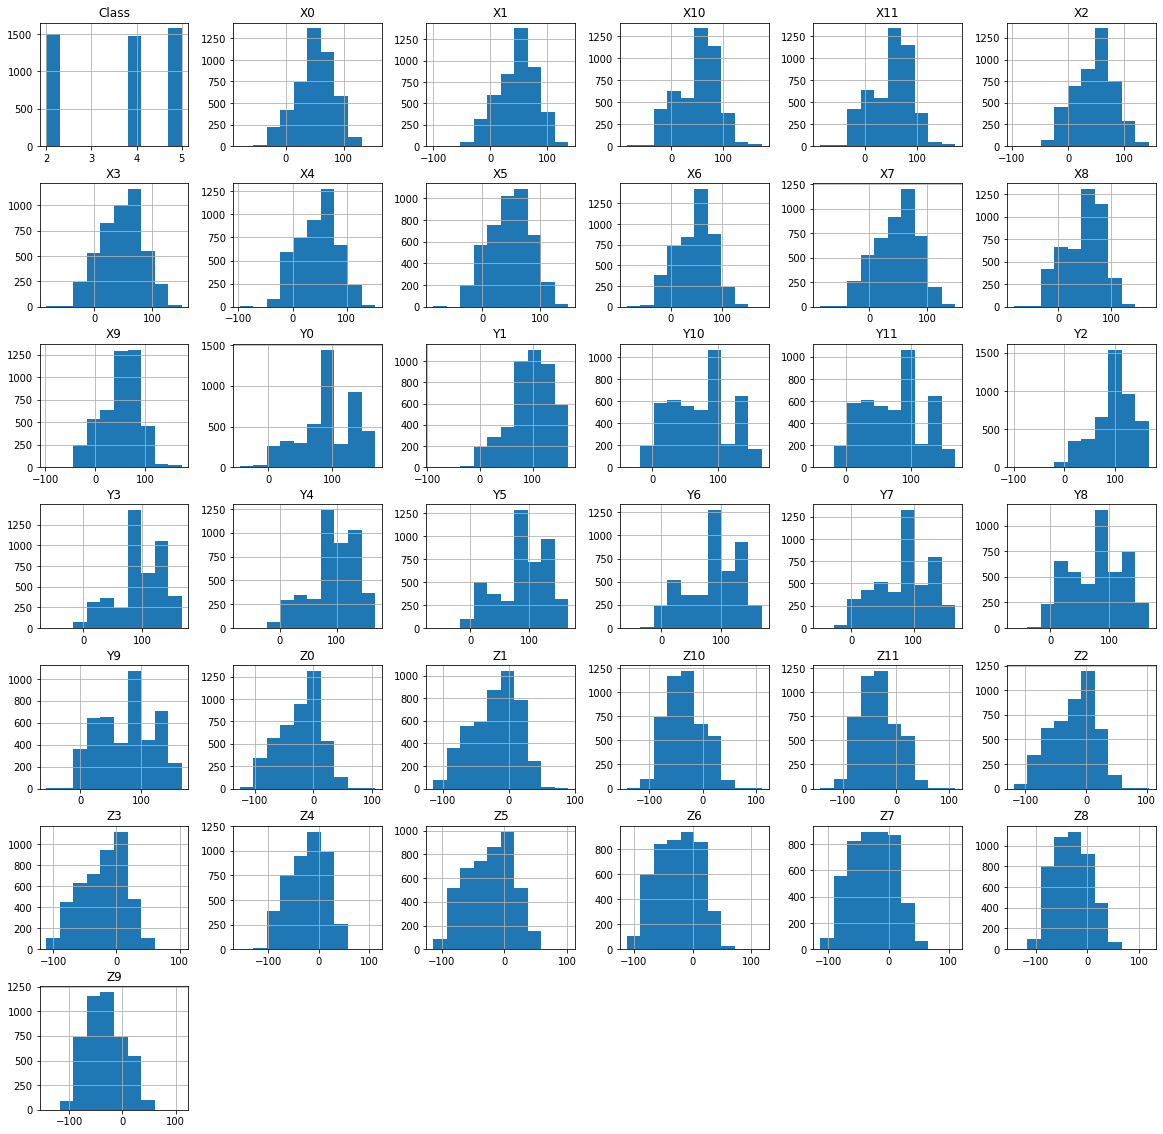

In [195]:
df_pandas.hist(bins = 10, figsize = (20,20));

Since most of the data is already centered between -100 and +100 I don't believe there is need for MinMax Scaler I rather decide to use standardization as a scaling method. Source: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In order to prevent data leakage in grid search I decided to build pipeline

In [359]:
#Pipeline for grid search and standard scaling
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('lr', LogisticRegression(max_iter = 10000))
])

Source: https://towardsdatascience.com/pre-process-data-with-pipeline-to-prevent-data-leakage-during-cross-validation-e3442cca7fdc

Train accurancy with grid search: 0.79
Best parameter: {'lr__C': 10.0, 'lr__multi_class': 'ovr'}
Accurancy on test: 0.80

Time: 3.52
              precision    recall  f1-score   support

         2.0       0.83      0.90      0.87       375
         4.0       0.78      0.76      0.77       369
         5.0       0.79      0.75      0.77       394

    accuracy                           0.80      1138
   macro avg       0.80      0.80      0.80      1138
weighted avg       0.80      0.80      0.80      1138



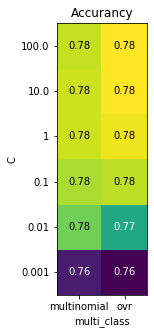

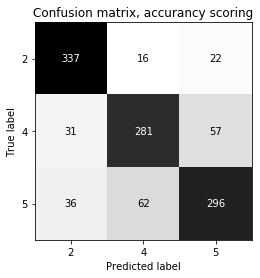

In [360]:
start = time.time()
param_grid = {'lr__C' : [0.001, 0.01, 0.1,1, 10.0, 100.0], 'lr__multi_class' : ['multinomial', 'ovr']}
grid_search = GridSearchCV(estimator = pipe, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(6,2)
end = time.time()

plt.figure(figsize=(8,5))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'multi_class', ylabel = 'C', xticklabels = param_grid['lr__multi_class'], yticklabels = param_grid['lr__C'], cmap = 'viridis')
plt.title("Accurancy")

print("Train accurancy with grid search: {:.2f}".format(grid_search.score(X_train, y_train)))
print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()
print(classification_report(y_test, pred))

Logistic regression is still not showing any signifficant difference on test result. It might indicate that logistic regression in this data set is not sensitive to feature selection and pre-processing. Before trying other classifiers I will also analyze PCA.

## Principal Component Analysis

I will implement dimensionality reduction using PCA. Then, simoultaneously, I will analyze original data set and dimension reduced data set to compare the results. I will use cumulative explained variance ratio to define number of components that I will use. Also, before performing PCA I will normalize the data, source: https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca

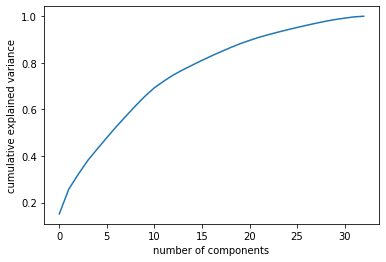

In [221]:
standard_scaler = StandardScaler()
standard_scaler.fit(X)
X_normal = standard_scaler.transform(X)
pca = PCA().fit(X_normal)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We can see that each new component add some valuable information and this picture indicate that there is no feature that does not bring any explanatory information to the dataset. Therefore we do not observe cumulative explained variance to be 1 before number of components is equal to 33 (total number of features). The treshold for cumulative explained variance that I decided to use is 90% just to see the overall result, time for calculation and to compare to the models that use full dimensions.

In [222]:
z = np.cumsum(pca.explained_variance_ratio_)
k = 0
for i in np.arange(0,33,1):
        if z[i] < 0.9:
            k = k + 1

print("Use number of components equal to: ", k + 1)

Use number of components equal to:  22


In [223]:
pca = PCA(n_components = 22)
pca.fit(X_normal)
X_pca = pca.transform(X_normal)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, stratify = y, random_state = 1)

In [227]:
print("X_train shape: {}".format(np.shape(X_train)))
print("X_test shape: {}".format(np.shape(X_test)))
print("X_train shape: {}".format(np.shape(X_pca_train)))
print("X_test shape: {}".format(np.shape(X_pca_test)))

X_train shape: (3412, 33)
X_test shape: (1138, 33)
X_train shape: (3412, 22)
X_test shape: (1138, 22)


Train accurancy with grid search: 0.77
Best parameter: {'C': 1, 'multi_class': 'ovr'}
Accurancy on test: 0.78

Time: 1.64
              precision    recall  f1-score   support

         2.0       0.81      0.87      0.84       375
         4.0       0.78      0.73      0.75       369
         5.0       0.75      0.74      0.74       394

    accuracy                           0.78      1138
   macro avg       0.78      0.78      0.78      1138
weighted avg       0.78      0.78      0.78      1138



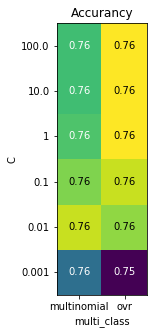

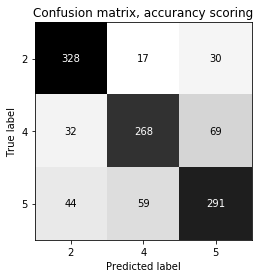

In [273]:
#Once more checking logistic regression with PCA

start = time.time()
logreg = LogisticRegression(max_iter = 10000)
param_grid = {'C' : [0.001, 0.01, 0.1,1, 10.0, 100.0], 'multi_class' : ['multinomial', 'ovr']}
grid_search = GridSearchCV(logreg, param_grid = param_grid, cv = 5)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(6,2)
end = time.time()

plt.figure(figsize=(8,5))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'multi_class', ylabel = 'C', xticklabels = param_grid['multi_class'], yticklabels = param_grid['C'], cmap = 'viridis')
plt.title("Accurancy")

print("Train accurancy with grid search: {:.2f}".format(grid_search.score(X_pca_train, y_pca_train)))
print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()
print(classification_report(y_pca_test, pred))

## Building weak learners for ensamble learning algorithm

Best parameter: {'knn__n_neighbors': 1, 'knn__weights': 'uniform'}
Accurancy on test: 0.83

Time: 18.89


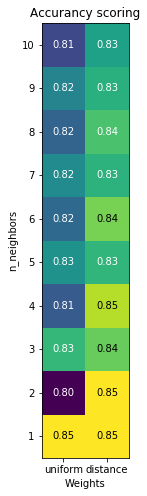

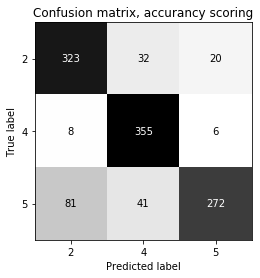

In [282]:
##Checking other learners
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

start = time.time()
param_grid = {'knn__n_neighbors' : [1,2,3,4,5,6,7,8,9,10], 'knn__weights' : ['uniform', 'distance']} 
grid_search = GridSearchCV(pipe, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(10,2)
end = time.time()

plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'Weights', ylabel = 'n_neighbors', xticklabels = param_grid['knn__weights'], yticklabels = param_grid['knn__n_neighbors'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter, roc_auc scoring: {'knn__n_neighbors': 8, 'knn__weights': 'distance'}
Test set AUC: 0.96
Accurancy on test: 0.84
Time: 17.27


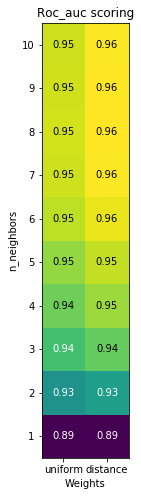

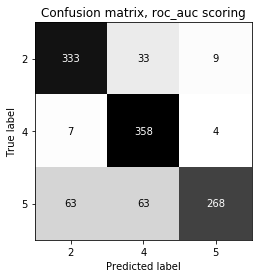

In [288]:
start = time.time()
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn = KNeighborsClassifier()
param_grid = {'knn__n_neighbors' : [1,2,3,4,5,6,7,8,9,10], 'knn__weights' : ['uniform', 'distance']} 
grid_search = GridSearchCV(pipe, param_grid, scoring = "roc_auc_ovr", cv = 5)
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
end = time.time()

plt.figure(figsize = (10,8))
scores = grid_search.cv_results_['mean_test_score'].reshape(10,2)
plt.title("Roc_auc scoring")
ax1 = mglearn.tools.heatmap(scores, xlabel = 'Weights', ylabel = 'n_neighbors', xticklabels = param_grid['knn__weights'], yticklabels = param_grid['knn__n_neighbors'], cmap = 'viridis')


print("Best parameter, roc_auc scoring: {}".format(grid_search.best_params_))
print("Test set AUC: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Accurancy on test: {:.2f}".format(accuracy_score(y_test, pred)))
print("Time: {:.2f}".format(end - start))

plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, roc_auc scoring")
plt.gca().invert_yaxis()

Best parameter: {'n_neighbors': 1, 'weights': 'uniform'}
Accurancy on test: 0.84

Time: 12.00


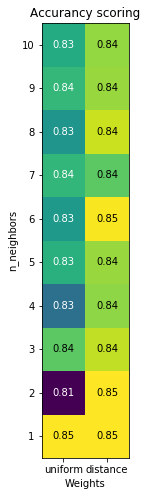

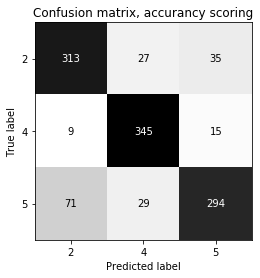

In [286]:
#KNN + PCA
start = time.time()
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10], 'weights' : ['uniform', 'distance']} 
grid_search = GridSearchCV(knn , param_grid, cv = 5)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(10,2)
end = time.time()


plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'Weights', ylabel = 'n_neighbors', xticklabels = param_grid['weights'], yticklabels = param_grid['n_neighbors'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Best parameter: {'svc__C': 1}
Accuracy on test: 0.80
Time: 20.52


C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


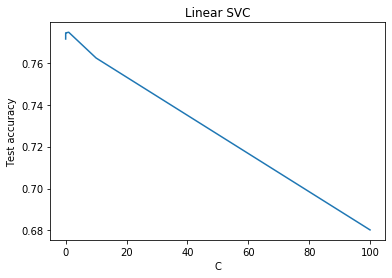

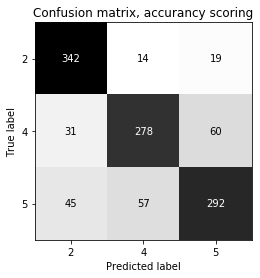

In [296]:
#Linear SVC
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('svc', LinearSVC())
]);

start = time.time()
param_grid = {'svc__C' : [0.001, 0.01, 0.1, 1, 10, 100]};
grid_search = GridSearchCV(pipe, param_grid, cv = 5);
grid_search.fit(X_train, y_train);
pred = grid_search.predict(X_test);
scores = grid_search.cv_results_['mean_test_score'];
end = time.time()

plt.figure()
plt.plot([0.001, 0.01, 0.1, 1, 10, 100], scores);
plt.xlabel("C")
plt.ylabel("Test accuracy")
plt.title("Linear SVC")
print("Best parameter: {}".format(grid_search.best_params_));
print("Accuracy on test: {:.2f}".format(grid_search.score(X_test, y_test)));
print("Time: {:.2f}".format(end - start));

plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()


C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

Best parameter: {'C': 1}
Accuracy on test: 0.78
Time: 14.45


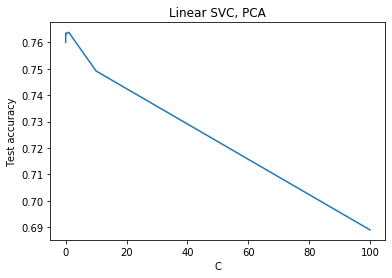

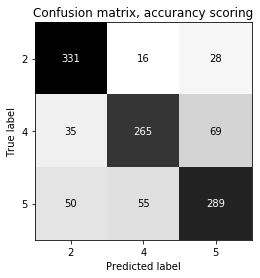

In [297]:
#linear svm + PCA
start = time.time()
svc = LinearSVC()
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(svc, param_grid, cv = 5)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()

plt.figure()
plt.plot([0.001, 0.01, 0.1, 1, 10, 100], scores)
plt.xlabel("C")
plt.ylabel("Test accuracy")
plt.title("Linear SVC, PCA")
print("Best parameter: {}".format(grid_search.best_params_))
print("Accuracy on test: {:.2f}".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))

plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter: {'svc__C': 100, 'svc__gamma': 0.01}
Accurancy on test: 0.94

Time: 173.83


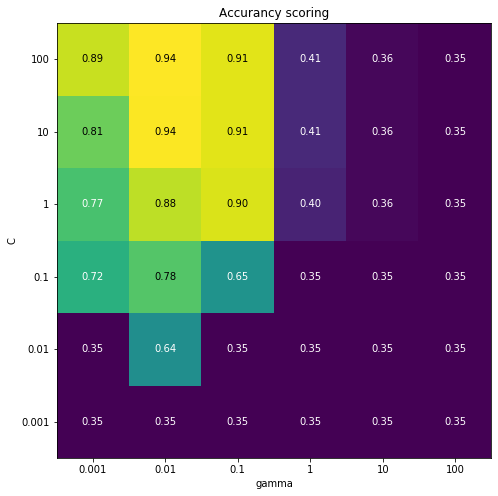

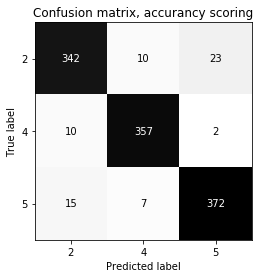

In [299]:
###SVM, accurancy, scaled
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('svc', SVC())
])

start = time.time()
param_grid = {'svc__C' : [0.001, 0.01, 0.1, 1, 10, 100], 'svc__gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(pipe, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
end = time.time()

plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'gamma', ylabel = 'C', xticklabels = param_grid['svc__gamma'], yticklabels = param_grid['svc__C'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter: {'svc__C': 10, 'svc__degree': 2}
Accurancy on test: 0.92

Time: 124.24


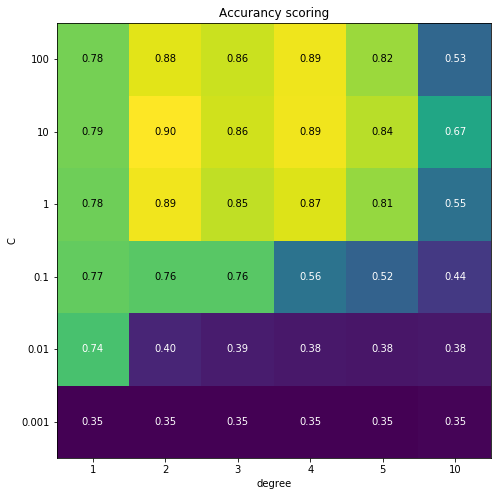

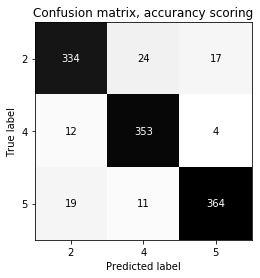

In [361]:
###SVM, poly, accurancy, scaled
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('svc', SVC(kernel = 'poly'))
])

start = time.time()
param_grid = {'svc__C' : [0.001, 0.01, 0.1, 1, 10, 100], 'svc__degree' : [1,2,3,4,5,10]}
grid_search = GridSearchCV(pipe, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
end = time.time()

plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'degree', ylabel = 'C', xticklabels = param_grid['svc__degree'], yticklabels = param_grid['svc__C'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter: {'C': 100, 'gamma': 0.01}
Accurancy on test: 0.90

Time: 145.37


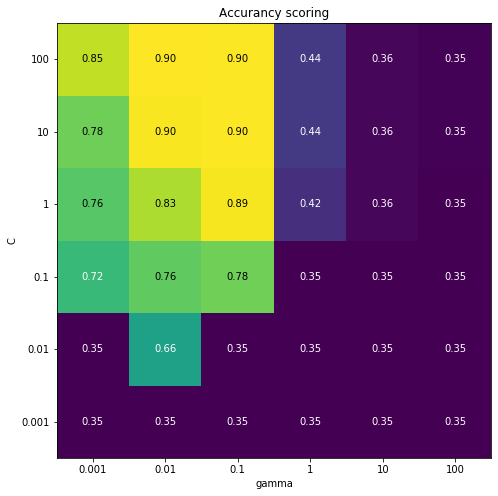

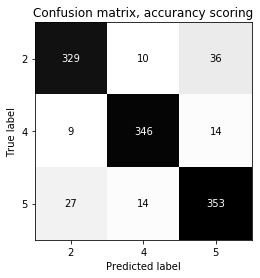

In [301]:
#SVM + PCA
#RBF
start = time.time()
svm = SVC(kernel = 'rbf')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(svm, param_grid, cv = 5)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
end = time.time()


plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'gamma', ylabel = 'C', xticklabels = param_grid['gamma'], yticklabels = param_grid['C'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter: {'C': 10, 'degree': 4}
Accurancy on test: 0.86

Time: 114.12


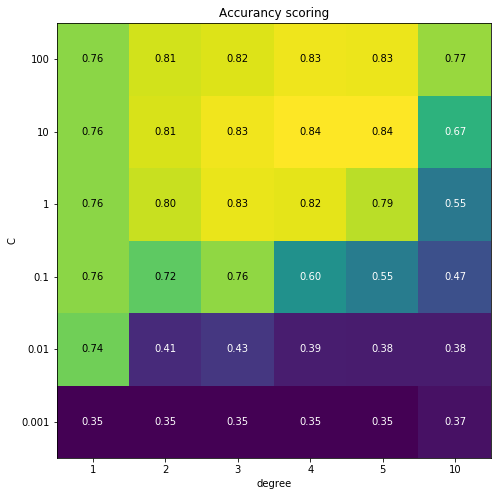

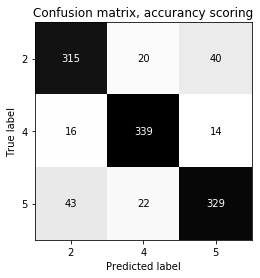

In [302]:
#SVM + PCA
#POLY
start = time.time()
svm = SVC(kernel = 'poly')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'degree' : [1,2,3,4,5,10]}
grid_search = GridSearchCV(svm, param_grid, cv = 5)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
end = time.time()


plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'degree', ylabel = 'C', xticklabels = param_grid['degree'], yticklabels = param_grid['C'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter: {'tree__max_depth': 50, 'tree__max_leaf_nodes': 200}
Accurancy on test: 0.80

Time: 38.49


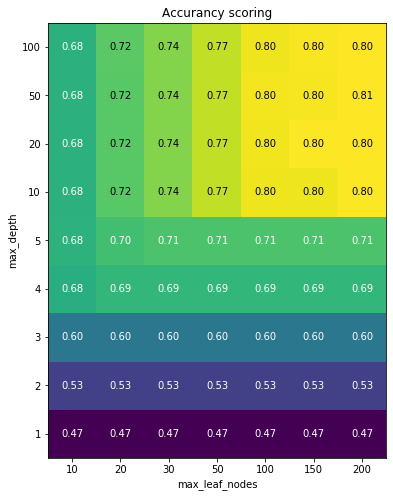

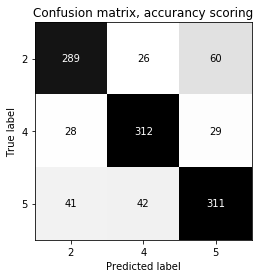

In [303]:
###DTR, accurancy, scaled
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion = 'entropy'))
])

start = time.time()
param_grid = {'tree__max_depth' : [1,2,3,4,5,10,20,50, 100], 'tree__max_leaf_nodes' : [10,20,30,50,100, 150, 200]}
grid_search = GridSearchCV(pipe, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(9,7)
end = time.time()

plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'max_leaf_nodes', ylabel = 'max_depth', xticklabels = param_grid['tree__max_leaf_nodes'], yticklabels = param_grid['tree__max_depth'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter, roc_auc scoring: {'tree__max_depth': 10, 'tree__max_leaf_nodes': 50}
AUC score: 0.90

Accurancy on test: 0.75
Time: 39.43


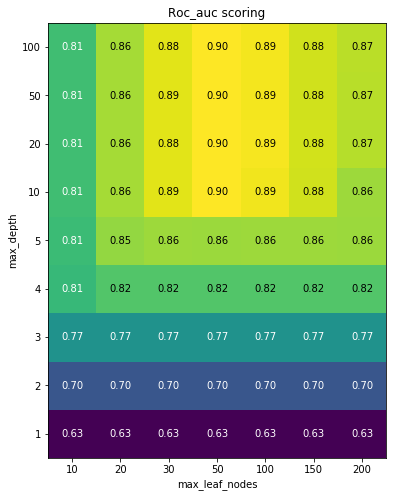

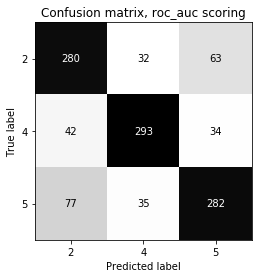

In [304]:
###DTR, roc_auc, scaled

pipe = Pipeline([
    ('sc', StandardScaler()),
    ('tree', DecisionTreeClassifier(criterion = 'entropy'))
])

start = time.time()
param_grid = {'tree__max_depth' : [1,2,3,4,5,10,20,50, 100], 'tree__max_leaf_nodes' : [10,20,30,50,100,150,200]}
grid_search = GridSearchCV(pipe, param_grid, cv = 5, scoring = "roc_auc_ovr")
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(9,7)
end = time.time()


plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'max_leaf_nodes', ylabel = 'max_depth', xticklabels = param_grid['tree__max_leaf_nodes'], yticklabels = param_grid['tree__max_depth'], cmap = 'viridis')
plt.title("Roc_auc scoring")

print("Best parameter, roc_auc scoring: {}".format(grid_search.best_params_))
print("AUC score: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Accurancy on test: {:.2f}".format(accuracy_score(y_test, pred)))
print("Time: {:.2f}".format(end - start))

plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, roc_auc scoring")
plt.gca().invert_yaxis()

Best parameter: {'max_depth': 20, 'max_leaf_nodes': 200}
Accurancy on test: 0.84

Time: 24.69


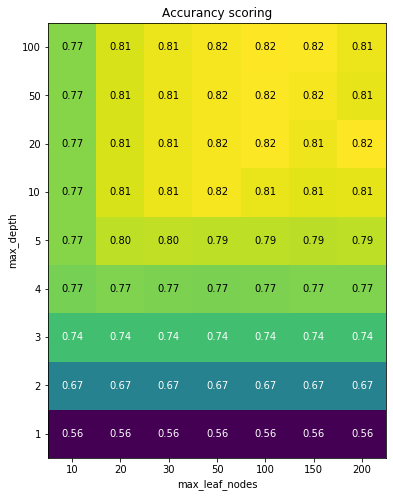

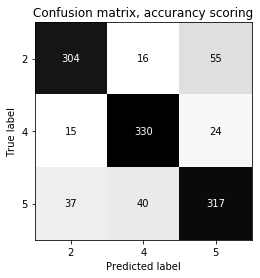

In [305]:
#DTR + PCA

start = time.time()
tree = DecisionTreeClassifier(criterion = 'entropy')
param_grid = {'max_depth' : [1,2,3,4,5,10,20,50, 100], 'max_leaf_nodes' : [10,20,30,50,100, 150, 200]}
grid_search = GridSearchCV(tree, param_grid, cv = 5)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(9,7)
end = time.time()


plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'max_leaf_nodes', ylabel = 'max_depth', xticklabels = param_grid['max_leaf_nodes'], yticklabels = param_grid['max_depth'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Best parameter: {'mlp__activation': 'relu', 'mlp__alpha': 1}
Accurancy on test: 0.92

Time: 112.70


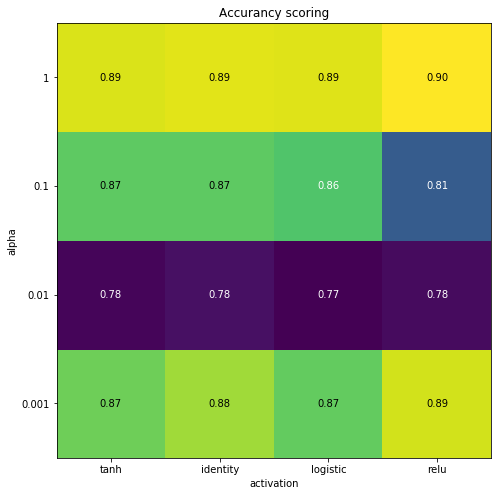

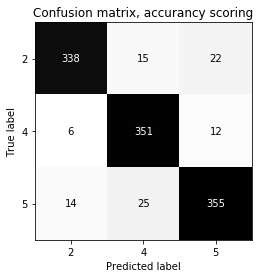

In [310]:
###MLP, accurancy, scaled
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('mlp', MLPClassifier(solver = 'adam', hidden_layer_sizes = [20,20]))
])

start = time.time()
param_grid = {'mlp__alpha' : [0.001, 0.01, 0.1, 1], 'mlp__activation' : ['tanh', 'identity', 'logistic', 'relu']}
grid_search = GridSearchCV(pipe, param_grid, cv = 3)
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(4,4)
end = time.time()


plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'activation', ylabel = 'alpha', xticklabels = param_grid['mlp__activation'], yticklabels = param_grid['mlp__alpha'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

After finding best alpha and activation function, I will now look for best layer size and compare accuracy netween train and test

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Best parameter: {'mlp__hidden_layer_sizes': [100, 100]}
Accurancy on test: 0.95

Time: 72.07


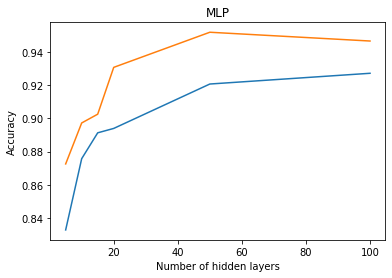

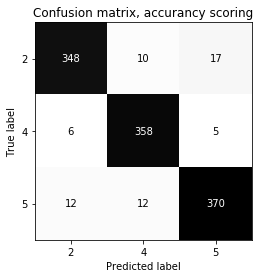

In [317]:
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('mlp', MLPClassifier(solver = 'adam', alpha = 1, activation = 'relu'))
])
test_accuracy = []

start = time.time()
param_grid = {'mlp__hidden_layer_sizes' : [[5,5], [10,10], [15,15], [20,20], [50,50], [100,100]]}
grid_search = GridSearchCV(pipe, param_grid, cv = 3)
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
for i in [[5,5], [10,10], [15,15], [20,20], [50,50], [100,100]]:
    mlp = MLPClassifier(solver = 'adam', alpha = 1, activation = 'relu', hidden_layer_sizes = i)
    mlp.fit(X_train_norm, y_train)
    test_accuracy.append(mlp.score(X_test_norm, y_test))



plt.figure()
plt.plot([5, 10, 15, 20, 50, 100], scores)
plt.plot([5, 10, 15, 20, 50, 100], test_accuracy)
plt.xlabel("Number of hidden layers")
plt.ylabel("Accuracy")
plt.title("MLP")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()



Best thing to use is [50,50] for hidden layers

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Best parameter, roc_auc scoring: {'mlp__activation': 'relu', 'mlp__alpha': 1}
AUC on test: 0.98

Accurancy on test: 0.9191564147627417
Time: 215.07


C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


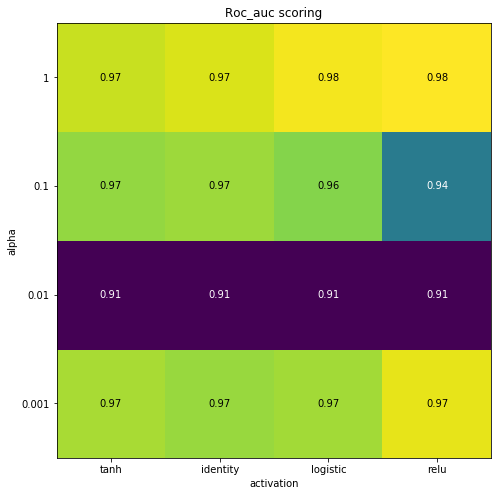

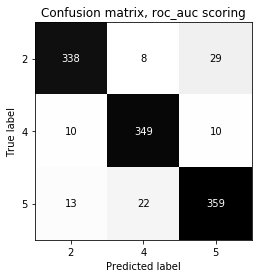

In [318]:
###MLP, roc_auc, scaled
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('mlp', MLPClassifier(solver = 'adam', hidden_layer_sizes = [20,20]))
])

start = time.time()
param_grid = {'mlp__alpha' : [0.001, 0.01, 0.1, 1], 'mlp__activation' : ['tanh', 'identity', 'logistic', 'relu']}
grid_search = GridSearchCV(pipe, param_grid, scoring = "roc_auc_ovr")
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(4,4)
end = time.time()


plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'activation', ylabel = 'alpha', xticklabels = param_grid['mlp__activation'], yticklabels = param_grid['mlp__alpha'], cmap = 'viridis')
plt.title("Roc_auc scoring")

print("Best parameter, roc_auc scoring: {}".format(grid_search.best_params_))
print("AUC on test: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Accurancy on test: {}".format(accuracy_score(y_test, pred)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, roc_auc scoring")
plt.gca().invert_yaxis()

Repeating the same procedure with the last neural network

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Best parameter: {'mlp__hidden_layer_sizes': [100, 100]}
Accurancy on test: 0.95

Time: 75.31


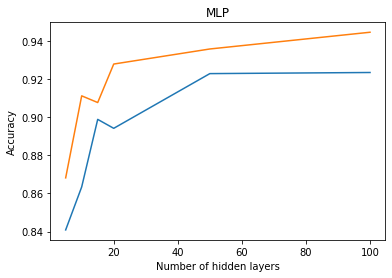

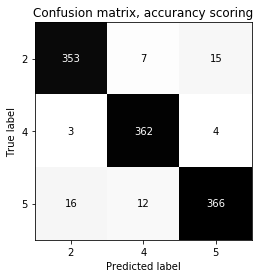

In [319]:
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('mlp', MLPClassifier(solver = 'adam', alpha = 1, activation = 'relu'))
])
test_accuracy = []

start = time.time()
param_grid = {'mlp__hidden_layer_sizes' : [[5,5], [10,10], [15,15], [20,20], [50,50], [100,100]]}
grid_search = GridSearchCV(pipe, param_grid, cv = 3)
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()

scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
for i in [[5,5], [10,10], [15,15], [20,20], [50,50], [100,100]]:
    mlp = MLPClassifier(solver = 'adam', alpha = 1, activation = 'relu', hidden_layer_sizes = i)
    mlp.fit(X_train_norm, y_train)
    test_accuracy.append(mlp.score(X_test_norm, y_test))



plt.figure()
plt.plot([5, 10, 15, 20, 50, 100], scores)
plt.plot([5, 10, 15, 20, 50, 100], test_accuracy)
plt.xlabel("Number of hidden layers")
plt.ylabel("Accuracy")
plt.title("MLP")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()



Based on this, best hidden layer to use is [100,100]

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

Best parameter: {'activation': 'relu', 'alpha': 1}
Accurancy on test: 0.80

Time: 201.91


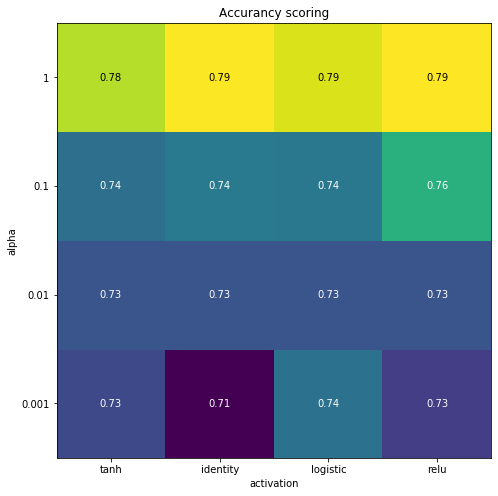

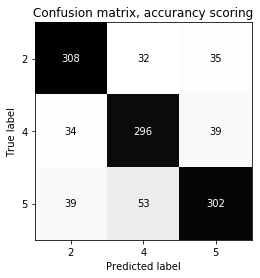

In [44]:
#PCA + MLP
#
start = time.time()
mlp = MLPClassifier(solver = 'adam', hidden_layer_sizes = [20,20])
param_grid = {'alpha' : [0.001, 0.01, 0.1, 1], 'activation' : ['tanh', 'identity', 'logistic', 'relu']}
grid_search = GridSearchCV(mlp, param_grid)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score'].reshape(4,4)
end = time.time()


plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'activation', ylabel = 'alpha', xticklabels = param_grid['activation'], yticklabels = param_grid['alpha'], cmap = 'viridis')
plt.title("Accurancy scoring")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

Best parameter: {'hidden_layer_sizes': [100, 100]}
Accurancy on test: 0.91

Time: 68.70


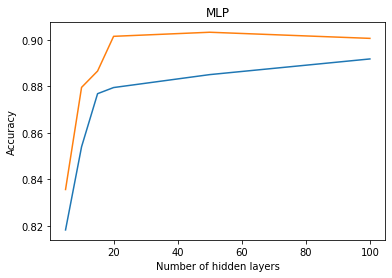

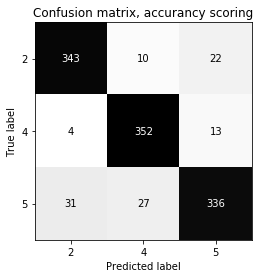

In [326]:
start = time.time()
mlp = MLPClassifier(solver = 'adam', activation = 'relu', alpha = 1)
param_grid = {'hidden_layer_sizes' : [[5,5], [10,10], [15,15], [20,20], [50,50], [100,100]]}
grid_search = GridSearchCV(mlp, param_grid, cv = 3)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()


test_accuracy = []
for i in [[5,5], [10,10], [15,15], [20,20], [50,50], [100,100]]:
    mlp = MLPClassifier(solver = 'adam', alpha = 1, activation = 'relu', hidden_layer_sizes = i)
    mlp.fit(X_pca_train, y_pca_train)
    test_accuracy.append(mlp.score(X_pca_test, y_pca_test))



plt.figure()
plt.plot([5, 10, 15, 20, 50, 100], scores, label = 'Train accuracy')
plt.plot([5, 10, 15, 20, 50, 100], test_accuracy, label = 'Test accuracy')
plt.xlabel("Number of hidden layers")
plt.ylabel("Accuracy")
plt.title("MLP")


print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()



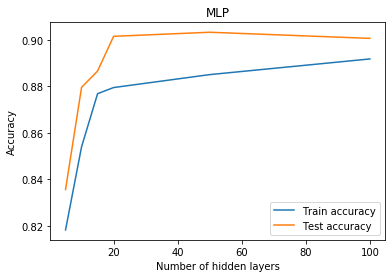

In [327]:
plt.figure()
plt.plot([5, 10, 15, 20, 50, 100], scores, label = 'Train accuracy')
plt.plot([5, 10, 15, 20, 50, 100], test_accuracy, label = 'Test accuracy')
plt.xlabel("Number of hidden layers")
plt.ylabel("Accuracy")
plt.title("MLP")
plt.legend()

Best number of hidden layers to use in PCA analysis is [50,50]

Best parameter: {'forest__n_estimators': 150}
Accurancy on test: 0.94

Time: 47.67


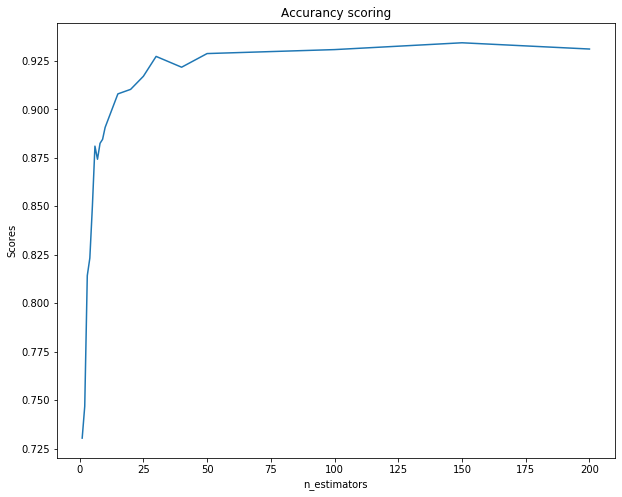

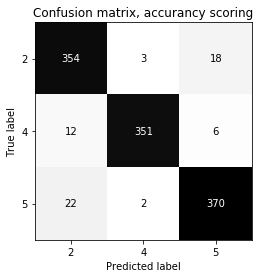

In [329]:
###FOREST, accurancy, scaled
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('forest', RandomForestClassifier())
])

start = time.time()
param_grid = {'forest__n_estimators' : [1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200]}
grid_search = GridSearchCV(pipe, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()


plt.figure(figsize=(10,8))
plt.plot([1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200], scores)
plt.title("Accurancy scoring")
plt.xlabel("n_estimators")
plt.ylabel("Scores")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter, roc_auc scoring: {'forest__n_estimators': 200}
AUC score on test: 0.99

Accurancy on test: 0.95
Time: 49.05


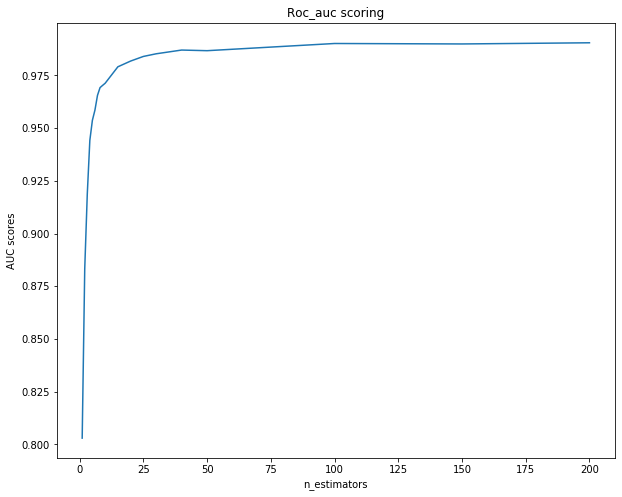

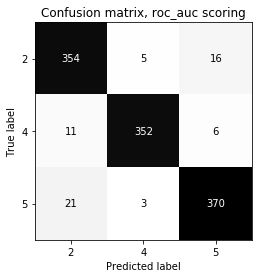

In [330]:
###FOREST, roc_auc, scaled
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('forest', RandomForestClassifier())
])

start = time.time()
param_grid = {'forest__n_estimators' : [1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200]}
grid_search = GridSearchCV(pipe, param_grid, cv = 5, scoring = "roc_auc_ovr")
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()


plt.figure(figsize=(10,8))
plt.plot([1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200], scores)
plt.title("Roc_auc scoring")
plt.xlabel("n_estimators")
plt.ylabel("AUC scores")

print("Best parameter, roc_auc scoring: {}".format(grid_search.best_params_))
print("AUC score on test: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Accurancy on test: {:.2f}".format(accuracy_score(y_test, pred)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, roc_auc scoring")
plt.gca().invert_yaxis()

Best parameter: {'n_estimators': 200}
Accurancy on test: 0.90

Time: 41.81


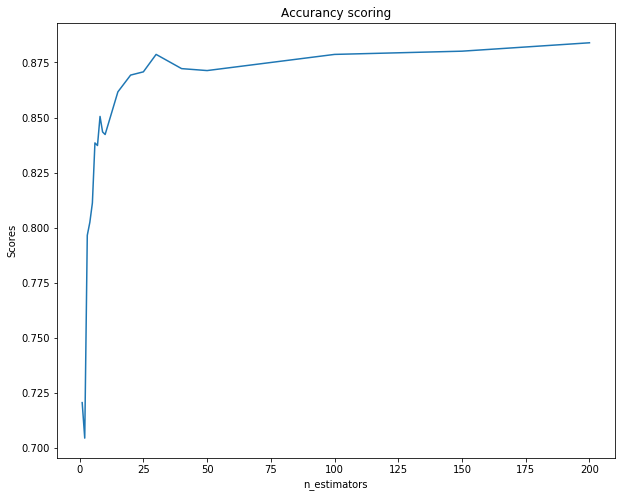

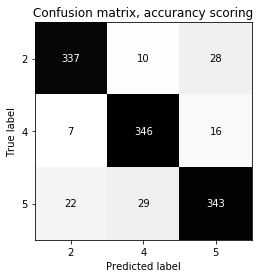

In [331]:
#PCA + forest
start = time.time()
forest = RandomForestClassifier()
param_grid = {'n_estimators' : [1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200]}
grid_search = GridSearchCV(forest, param_grid, cv = 5)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()


plt.figure(figsize=(10,8))
plt.plot([1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200], scores)
plt.title("Accurancy scoring")
plt.xlabel("n_estimators")
plt.ylabel("Scores")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter: {'gbrt__n_estimators': 200}
Accurancy on test: 0.97

Time: 340.44


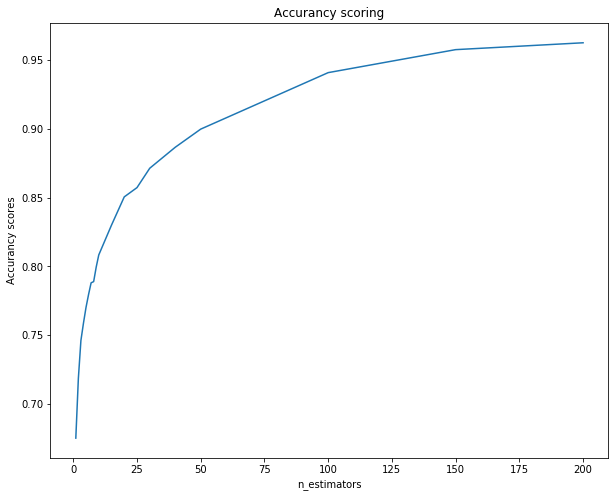

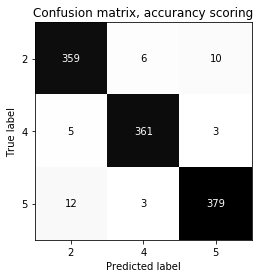

In [333]:
###GRADIENT, accurancy, scaled
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('gbrt', GradientBoostingClassifier())
])

start = time.time()
param_grid = {'gbrt__n_estimators' : [1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200]}
grid_search = GridSearchCV(pipe, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()


plt.figure(figsize=(10,8))
plt.plot([1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200], scores)
plt.title("Accurancy scoring")
plt.xlabel("n_estimators")
plt.ylabel("Accurancy scores")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Best parameter, roc_auc scoring: {'gbrt__n_estimators': 200}
AUC score on test: 1.00

Accurancy on test: 0.97
Time: 339.75


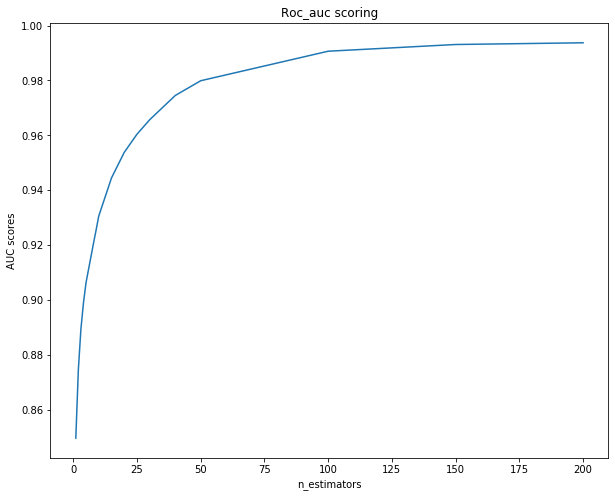

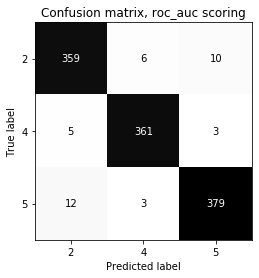

In [334]:
###GRADIENT, roc_auc, scaled
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('gbrt', GradientBoostingClassifier())
])

start = time.time()
gbrt = GradientBoostingClassifier()
param_grid = {'gbrt__n_estimators' : [1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200]}
grid_search = GridSearchCV(pipe, param_grid, cv = 5, scoring = "roc_auc_ovr")
grid_search.fit(X_train, y_train)
pred = grid_search.predict(X_test)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()


plt.figure(figsize=(10,8))
plt.plot([1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200], scores)
plt.title("Roc_auc scoring")
plt.xlabel("n_estimators")
plt.ylabel("AUC scores")

print("Best parameter, roc_auc scoring: {}".format(grid_search.best_params_))
print("AUC score on test: {:.2f}\n".format(grid_search.score(X_test, y_test)))
print("Accurancy on test: {:.2f}".format(accuracy_score(y_test, pred)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, roc_auc scoring")
plt.gca().invert_yaxis()

Best parameter: {'n_estimators': 200}
Accurancy on test: 0.90

Time: 39.80


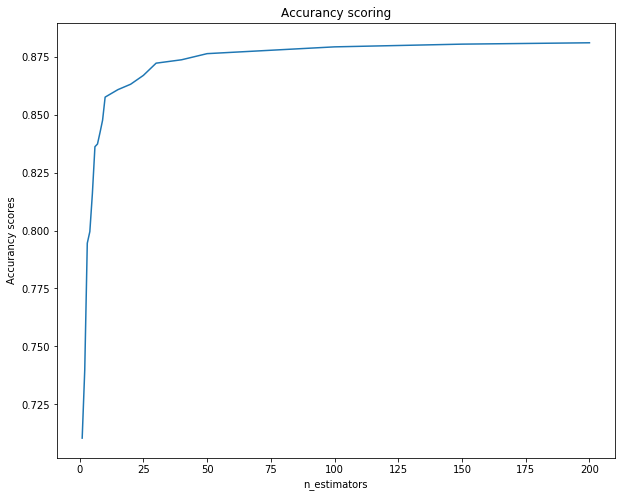

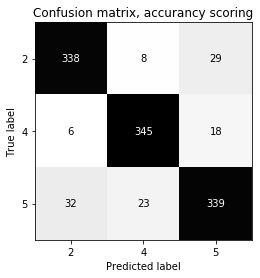

In [335]:
#PCA + Gradient
start = time.time()
gbrt = GradientBoostingClassifier()
param_grid = {'n_estimators' : [1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200]}
grid_search = GridSearchCV(forest, param_grid, cv = 5)
grid_search.fit(X_pca_train, y_pca_train)
pred = grid_search.predict(X_pca_test)
scores = grid_search.cv_results_['mean_test_score']
end = time.time()


plt.figure(figsize=(10,8))
plt.plot([1,2,3,4,5,6,7,8,9,10,15,20, 25, 30, 40, 50, 100, 150, 200], scores)
plt.title("Accurancy scoring")
plt.xlabel("n_estimators")
plt.ylabel("Accurancy scores")

print("Best parameter: {}".format(grid_search.best_params_))
print("Accurancy on test: {:.2f}\n".format(grid_search.score(X_pca_test, y_pca_test)))
print("Time: {:.2f}".format(end - start))
plt.figure()
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

Now after finding best hyperparameters with weak learners I am going to build ensemble learning algorithm

## Ensemble learning

In [362]:
##Voting classifier
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_snorm = scaler.transform(X_test)

model_accurancy = VotingClassifier(estimators = 
                        [('knn', KNeighborsClassifier(n_neighbors = 1, weights = 'uniform')),
                        ('svc_rbf', SVC(kernel = 'rbf', C = 100, gamma = 0.01)),
                        ('svc_poly', SVC(kernel = 'poly', C = 10, degree = 2)),
                        ('tree', DecisionTreeClassifier(max_depth = 50, max_leaf_nodes = 200, criterion = 'entropy')),
                        ('mlp', MLPClassifier(solver = 'adam', activation = 'relu', alpha = 1, hidden_layer_sizes = [50,50])),
                        ('forest', RandomForestClassifier(n_estimators = 150)),
                        ('gbrt', GradientBoostingClassifier(n_estimators = 200))],          
                         voting = 'hard')

model_accurancy.fit(X_train_norm, y_train)

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=1,
                                                   p=2, weights='uniform')),
                             ('svc_rbf',
                              SVC(C=100, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=0.01, kernel='rbf', max_iter=-1,
                                  probability=False, r...
                                                         max_leaf_nodes=None,
                                                         min_impuri

Voting Test score: 0.96
              precision    recall  f1-score   support

         2.0       0.96      0.94      0.95       375
         4.0       0.96      0.98      0.97       369
         5.0       0.96      0.96      0.96       394

    accuracy                           0.96      1138
   macro avg       0.96      0.96      0.96      1138
weighted avg       0.96      0.96      0.96      1138



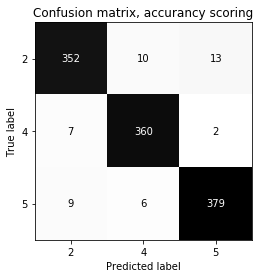

In [363]:
print("Voting Test score: {:.2f}".format(model_accurancy.score(X_test_norm, y_test)))
pred = model_accurancy.predict(X_test_norm)
print(classification_report(y_test, pred))
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

In [364]:
stacking = StackingClassifier(estimators = 
                        [('knn', KNeighborsClassifier(n_neighbors = 1, weights = 'uniform')),
                        ('svc_rbf', SVC(kernel = 'rbf', C = 100, gamma = 0.01)),
                        ('svc_poly', SVC(kernel = 'poly', C = 10, degree = 2)),
                        ('tree', DecisionTreeClassifier(max_depth = 50, max_leaf_nodes = 200, criterion = 'entropy')),
                        ('mlp', MLPClassifier(solver = 'adam', activation = 'relu', alpha = 1, hidden_layer_sizes = [50,50])),
                        ('forest', RandomForestClassifier(n_estimators = 150)),
                        ('gbrt', GradientBoostingClassifier(n_estimators = 200))],          
                         cv = 5)
stacking.fit(X_train_norm, y_train)

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

StackingClassifier(cv=5,
                   estimators=[('knn',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=1,
                                                     p=2, weights='uniform')),
                               ('svc_rbf',
                                SVC(C=100, break_ties=False, cache_size=200,
                                    class_weight=None, coef0=0.0,
                                    decision_function_shape='ovr', degree=3,
                                    gamma=0.01, kernel='rbf', max_iter=-1,
                                    probability=...
                                                           min_impurity_decrease=0.0,
                

Stacking Test score: 0.97
              precision    recall  f1-score   support

         2.0       0.98      0.95      0.96       375
         4.0       0.97      0.99      0.98       369
         5.0       0.97      0.97      0.97       394

    accuracy                           0.97      1138
   macro avg       0.97      0.97      0.97      1138
weighted avg       0.97      0.97      0.97      1138



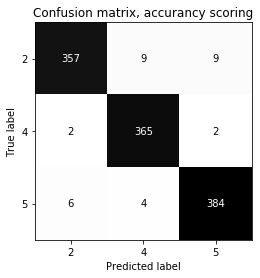

In [365]:
print("Stacking Test score: {:.2f}".format(stacking.score(X_test_norm, y_test)))
pred = stacking.predict(X_test_norm)
print(classification_report(y_test, pred))
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

In [350]:
model_auc = VotingClassifier(estimators = 
                        [('knn', KNeighborsClassifier(n_neighbors = 8, weights = 'distance')), 
                        ('svc_rbf', SVC(kernel = 'rbf', C = 100, gamma = 0.01)),
                        ('svc_poly', SVC(kernel = 'poly', C = 10, degree = 1)),
                        ('tree', DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 50, criterion = 'entropy')),
                        ('mlp', MLPClassifier(solver = 'adam', activation = 'relu', alpha = 1, hidden_layer_sizes = [100,100])),
                        ('forest', RandomForestClassifier(n_estimators = 200)),
                        ('gbrt', GradientBoostingClassifier(n_estimators = 200))],
                         voting = 'hard')

model_auc.fit(X_train_norm, y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=8,
                                                   p=2, weights='distance')),
                             ('svc_rbf',
                              SVC(C=100, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=0.01, kernel='rbf', max_iter=-1,
                                  probability=False,...
                                                         max_leaf_nodes=None,
                                                         min_impurit

Voting test score: 0.95
              precision    recall  f1-score   support

         2.0       0.93      0.95      0.94       375
         4.0       0.96      0.98      0.97       369
         5.0       0.97      0.93      0.95       394

    accuracy                           0.95      1138
   macro avg       0.95      0.95      0.95      1138
weighted avg       0.95      0.95      0.95      1138



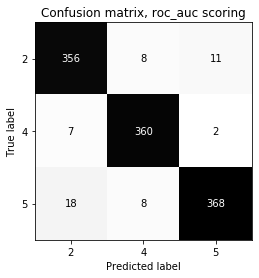

In [351]:
print("Voting test score: {:.2f}".format(model_auc.score(X_test_norm, y_test)))
pred = model_auc.predict(X_test_norm)
print(classification_report(y_test, pred))
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, roc_auc scoring")
plt.gca().invert_yaxis()

In [353]:
pca_model = VotingClassifier(estimators = 
                        [('knn', KNeighborsClassifier(n_neighbors = 1, weights = 'uniform')),
                        ('svc_rbf', SVC(kernel = 'rbf', C = 100, gamma = 0.01)),
                        ('svc_poly', SVC(kernel = 'poly', C = 10, degree = 4)),
                        ('tree', DecisionTreeClassifier(max_depth = 20, max_leaf_nodes = 200, criterion = 'entropy')),
                        ('mlp', MLPClassifier(solver = 'adam', activation = 'relu', alpha = 1, hidden_layer_sizes = [50,50])),
                        ('forest', RandomForestClassifier(n_estimators = 200)),
                        ('gbrt', GradientBoostingClassifier(n_estimators = 200))],
                         voting = 'hard')
pca_model.fit(X_pca_train, y_pca_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=1,
                                                   p=2, weights='uniform')),
                             ('svc_rbf',
                              SVC(C=100, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=0.01, kernel='rbf', max_iter=-1,
                                  probability=False, r...
                                                         max_leaf_nodes=None,
                                                         min_impuri

Voting Test score: 0.91
              precision    recall  f1-score   support

         2.0       0.90      0.89      0.90       375
         4.0       0.92      0.97      0.94       369
         5.0       0.90      0.87      0.89       394

    accuracy                           0.91      1138
   macro avg       0.91      0.91      0.91      1138
weighted avg       0.91      0.91      0.91      1138



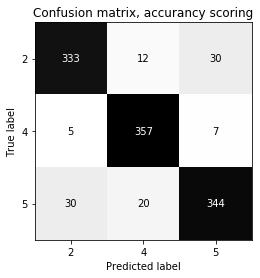

In [354]:
print("Voting Test score: {:.2f}".format(pca_model.score(X_pca_test, y_pca_test)))
pred = pca_model.predict(X_pca_test)
print(classification_report(y_pca_test, pred))
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

In [355]:
#Stacking classifier
stacking_pca = StackingClassifier(estimators = 
                        [('knn', KNeighborsClassifier(n_neighbors = 1, weights = 'uniform')),
                        ('svc_rbf', SVC(kernel = 'rbf', C = 100, gamma = 0.01)),
                        ('svc_poly', SVC(kernel = 'poly', C = 10, degree = 4)),
                        ('tree', DecisionTreeClassifier(max_depth = 20, max_leaf_nodes = 200, criterion = 'entropy')),
                        ('mlp', MLPClassifier(solver = 'adam', activation = 'relu', alpha = 1, hidden_layer_sizes = [50,50])),
                        ('forest', RandomForestClassifier(n_estimators = 200)),
                        ('gbrt', GradientBoostingClassifier(n_estimators = 200))],
                             cv = 5)
stacking_pca.fit(X_pca_train, y_pca_train)

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

StackingClassifier(cv=5,
                   estimators=[('knn',
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=1,
                                                     p=2, weights='uniform')),
                               ('svc_rbf',
                                SVC(C=100, break_ties=False, cache_size=200,
                                    class_weight=None, coef0=0.0,
                                    decision_function_shape='ovr', degree=3,
                                    gamma=0.01, kernel='rbf', max_iter=-1,
                                    probability=...
                                                           min_impurity_decrease=0.0,
                

Stacking Test score: 0.92
              precision    recall  f1-score   support

         2.0       0.92      0.90      0.91       375
         4.0       0.94      0.96      0.95       369
         5.0       0.90      0.90      0.90       394

    accuracy                           0.92      1138
   macro avg       0.92      0.92      0.92      1138
weighted avg       0.92      0.92      0.92      1138



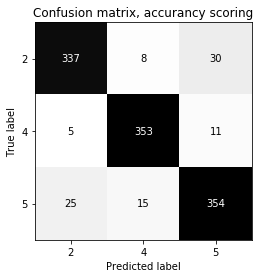

In [356]:
print("Stacking Test score: {:.2f}".format(stacking_pca.score(X_pca_test, y_pca_test)))
pred = stacking_pca.predict(X_pca_test)
print(classification_report(y_pca_test, pred))
ax2 = mglearn.tools.heatmap(
confusion_matrix(y_pca_test, pred), xlabel='Predicted label',
ylabel='True label', xticklabels= [2, 4, 5],
yticklabels=[2, 4, 5], cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix, accurancy scoring")
plt.gca().invert_yaxis()

This analysis showd strength of Ensemble learning alogorithm!

In [5]:
#######EX2

In [7]:
df_qsar = pd.read_csv(r'C:\Users\Ivan\Desktop\qsar_fish_toxicity.csv')

In [169]:
df_qsar

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,response
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


In [25]:
response = df_qsar['response']

Text(0.5, 1.0, 'Histogram of quantitative response L50')

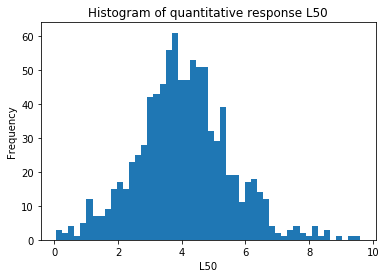

In [8]:
plt.hist(response, bins = 50)
plt.xlabel("L50")
plt.ylabel("Frequency")
plt.title("Histogram of quantitative response L50")

In [9]:
print("To check if the data is normally distributed I will perform Jarque-Bera test")

To check if the data is normally distributed I will perform Jarque-Bera test


In [10]:
n = len(response)
moment_2 = moment(response, 2)
moment_3 = moment(response, 3)
moment_4 = moment(response, 4)

S = moment_3 / ((moment_2)**(3/2))
K = moment_4 / (moment_2**2)

JB = n/6 * (S**2 + 1/4*(K - 3)**2)
print("Variable JB is chi-square distributed with two degrees of freedome")
print("5% significance critical value: ", 5.99)
print("Test statistics: {:.2f}".format(JB))
print("We reject null hypothesis that data is normally distributed")

Variable JB is chi-square distributed with two degrees of freedome
5% significance critical value:  5.99
Test statistics: 25.75
We reject null hypothesis that data is normally distributed


In [11]:
response_ln = np.log(response)
moment_2 = moment(response_ln, 2)
moment_3 = moment(response_ln, 3)
moment_4 = moment(response_ln, 4)

S = moment_3 / ((moment_2)**(3/2))
K = moment_4 / (moment_2**2)

JB = n/6 * (S**2 + 1/4*(K - 3)**2)
print("Variable JB is chi-square distributed with two degrees of freedome")
print("5% significance critical value: ", 5.99)
print("Test statistics: {:.2f}".format(JB))
print("We reject null hypothesis that data is normally distributed")

Variable JB is chi-square distributed with two degrees of freedome
5% significance critical value:  5.99
Test statistics: 7224.28
We reject null hypothesis that data is normally distributed


In [12]:
response_sin = np.sin(response)
moment_2 = moment(response_sin, 2)
moment_3 = moment(response_sin, 3)
moment_4 = moment(response_sin, 4)

S = moment_3 / ((moment_2)**(3/2))
K = moment_4 / (moment_2**2)

JB = n/6 * (S**2 + 1/4*(K - 3)**2)
print("Variable JB is chi-square distributed with two degrees of freedome")
print("5% significance critical value: ", 5.99)
print("Test statistics: {:.2f}".format(JB))
print("We reject null hypothesis that data is normally distributed")

Variable JB is chi-square distributed with two degrees of freedome
5% significance critical value:  5.99
Test statistics: 94.46
We reject null hypothesis that data is normally distributed


In [13]:
print("Since lowest value of JB statistics is obtained with the non-transformed data, I will use it in further analysis")

Since lowest value of JB statistics is obtained with the non-transformed data, I will use it in further analysis


In [26]:
cic0 = df_qsar['CIC0']
sm1 = df_qsar['SM1_Dz(Z)']
gat = df_qsar['GATS1i']
ndsch = df_qsar['NdsCH']
ndssc = df_qsar['NdssC']
mlogp = df_qsar['MLOGP']

Text(0.5, 1.0, 'Relationship: MLOGP vs L50')

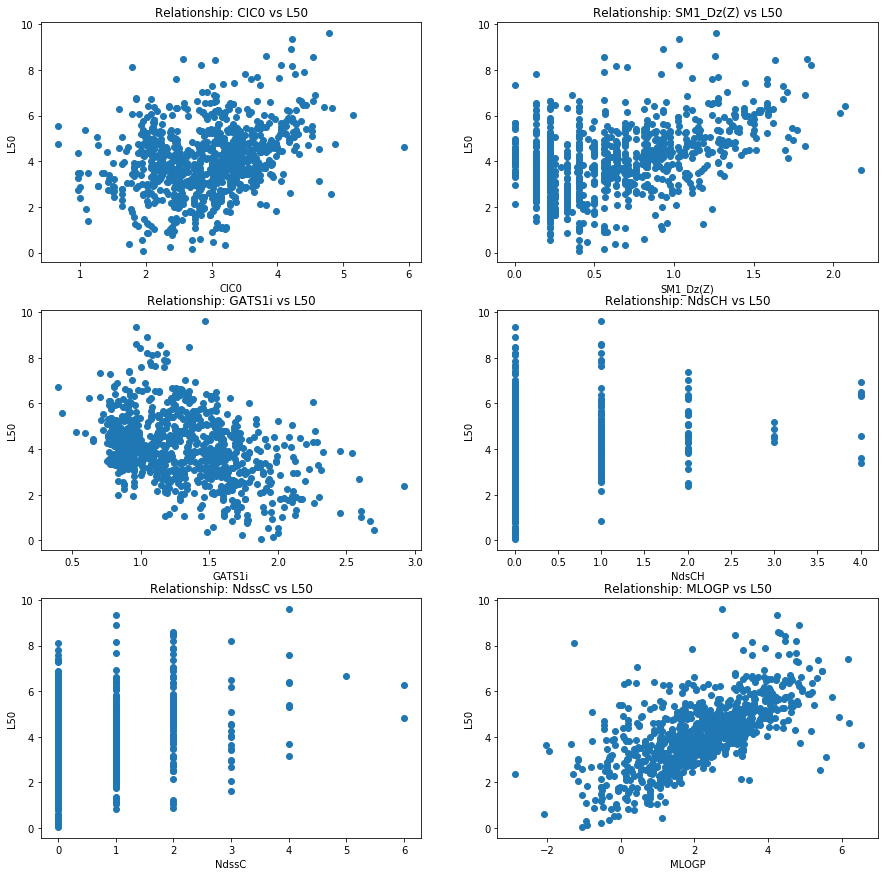

In [15]:
fig, ax = plt.subplots(3,2, figsize = (15,15))
ax[0,0].plot(cic0, response, 'o')
ax[0,0].set_xlabel("CIC0")
ax[0,0].set_ylabel("L50")
ax[0,0].set_title("Relationship: CIC0 vs L50")

ax[0,1].plot(sm1, response, 'o')
ax[0,1].set_xlabel("SM1_Dz(Z)")
ax[0,1].set_ylabel("L50")
ax[0,1].set_title("Relationship: SM1_Dz(Z) vs L50")

ax[1,0].plot(gat, response, 'o')
ax[1,0].set_xlabel("GATS1i")
ax[1,0].set_ylabel("L50")
ax[1,0].set_title("Relationship: GATS1i vs L50")

ax[1,1].plot(ndsch, response, 'o')
ax[1,1].set_xlabel("NdsCH")
ax[1,1].set_ylabel("L50")
ax[1,1].set_title("Relationship: NdsCH vs L50")

ax[2,0].plot(ndssc, response, 'o')
ax[2,0].set_xlabel("NdssC")
ax[2,0].set_ylabel("L50")
ax[2,0].set_title("Relationship: NdssC vs L50")

ax[2,1].plot(mlogp, response, 'o')
ax[2,1].set_xlabel("MLOGP")
ax[2,1].set_ylabel("L50")
ax[2,1].set_title("Relationship: MLOGP vs L50")

Text(0.5, 1.0, 'Correlation matrix')

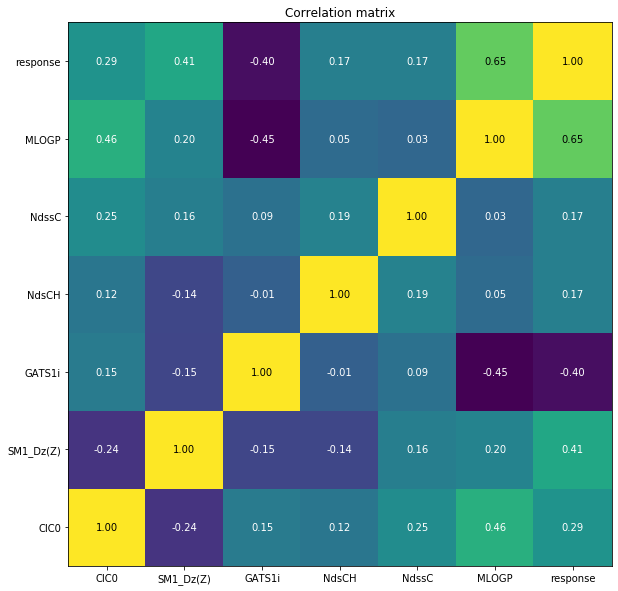

In [16]:
corr = df_qsar.corr()
corr_values = corr.values
plt.figure(figsize = (10,10))
mglearn.tools.heatmap(corr.values, xlabel = '', ylabel = '', xticklabels = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'response'], yticklabels = ['CIC0', 'SM1_Dz(Z)', 'GATS1i', 'NdsCH', 'NdssC', 'MLOGP', 'response'], cmap = 'viridis')
plt.title("Correlation matrix")

In [30]:
df = df_qsar.values
X = df[:,0:6]
y = df[:,6]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("To increase accurancy with linear regression I will use cross validation")


Training set score: 0.57
Test set score: 0.60
To increase accurancy with linear regression I will use cross validation


In [27]:
print("Linear regression with cross validation")
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv = 5)
print("Cross-validations scores: {}".format(scores))
print("Mean cross-validation score: {:.2f}".format(np.mean(scores)))
print("Test score")

Linear regression with cross validation
Cross-validations scores: [0.47937584 0.49342697 0.41881636 0.67962423 0.60322613]
Mean cross-validation score: 0.53
Test score


In [30]:
param_grid = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Test set score with ridge regression: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'alpha': 1}
Test set score with ridge regression: 0.60


In [31]:
param_grid = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
lasso = Lasso(max_iter = 100000)
grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Test set score with lasso regression {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'alpha': 0.001}
Test set score with lasso regression 0.60


Best parameters: {'C': 100}
Test set accurancy: 0.60


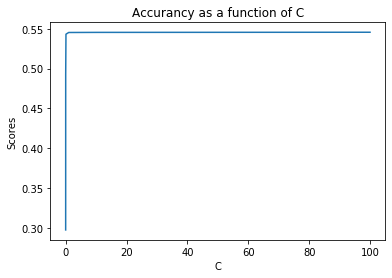

In [36]:
#SVR, linear
svr = SVR(gamma = 'auto', kernel = 'linear')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

scores = grid_search.cv_results_['mean_test_score']
plt.figure()
plt.plot([0.001, 0.01, 0.1, 1, 10, 100], scores)
plt.xlabel("C")
plt.ylabel("Scores")
plt.title("Accurancy as a function of C")

print("Best parameters: {}".format(grid_search.best_params_))
print("Test set accurancy: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'C': 1, 'gamma': 0.1}
Test set accurancy: 0.64


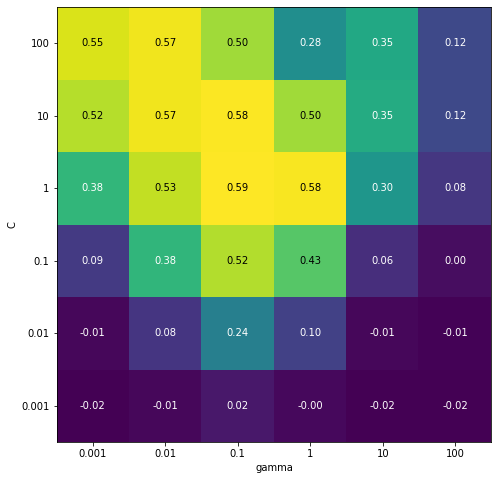

In [38]:
## SVR, rbf
svr = SVR(kernel = 'rbf')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'gamma', ylabel = 'C', xticklabels = param_grid['gamma'], yticklabels = param_grid['C'], cmap = 'viridis')

print("Best parameters: {}".format(grid_search.best_params_))
print("Test set accurancy: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'C': 1, 'degree': 1}
Test set accurancy: 0.65


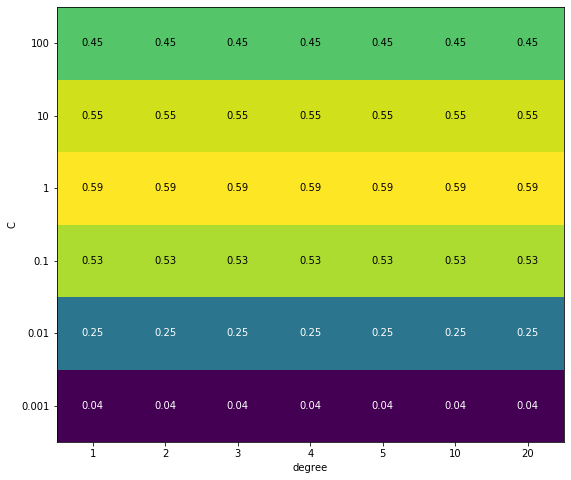

In [31]:
###SVR, poly
svr = SVR(kernel = 'rbf', gamma = 'auto')
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'degree' : [1,2,3,4,5,10,20]}
grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

scores = grid_search.cv_results_['mean_test_score'].reshape(6,7)
plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'degree', ylabel = 'C', xticklabels = param_grid['degree'], yticklabels = param_grid['C'], cmap = 'viridis')

print("Best parameters: {}".format(grid_search.best_params_))
print("Test set accurancy: {:.2f}".format(grid_search.score(X_test, y_test)))

Best parameters: {'max_depth': 4, 'max_leaf_nodes': 30}
Test set accurancy: 0.44


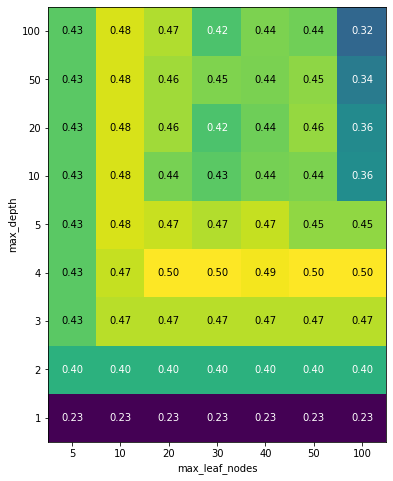

In [32]:
#dtr
dtrr = DecisionTreeRegressor(criterion = 'mae')
param_grid = {'max_depth' : [1,2,3,4,5,10,20,50,100], 'max_leaf_nodes' : [5, 10, 20, 30, 40, 50, 100]}
grid_search = GridSearchCV(dtrr, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

scores = grid_search.cv_results_['mean_test_score'].reshape(9,7)
plt.figure(figsize=(10,8))
ax1 = mglearn.tools.heatmap(scores, xlabel = 'max_leaf_nodes', ylabel = 'max_depth', xticklabels = param_grid['max_leaf_nodes'], yticklabels = param_grid['max_depth'], cmap = 'viridis')

print("Best parameters: {}".format(grid_search.best_params_))
print("Test set accurancy: {:.2f}".format(grid_search.score(X_test, y_test)))

In [4]:
df_qsar_indiv = pd.read_csv(r'C:\Users\Ivan\Desktop\2046587\2046587_qsar.csv', index_col = 0)
df_matrix = df_qsar_indiv.values

In [5]:
df_qsar_indiv

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,response
0,3.260,0.829,1.676,NaN,NaN,1.453,3.770
1,NaN,0.580,NaN,0.0,NaN,1.348,3.115
2,2.125,0.638,0.831,0.0,0.0,1.348,3.531
3,3.027,0.331,1.472,1.0,0.0,1.807,NaN
4,2.094,0.827,NaN,0.0,0.0,1.886,NaN
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,NaN,2.0,0.736,3.109
904,3.652,0.872,0.867,2.0,NaN,3.983,4.040
905,NaN,0.916,NaN,0.0,6.0,2.918,4.818
906,2.831,1.393,NaN,0.0,1.0,NaN,5.317


In [8]:
imp1 = SimpleImputer(strategy = 'mean').fit(df_matrix)
X_imp1 = imp1.transform(df_matrix)

min_mse = 1
min_k = 0
for i in np.arange(1,50,1):
    imp2 = KNNImputer(n_neighbors = i, weights = 'uniform').fit(df_matrix)
    X_imp2 = imp2.transform(df_matrix)
    mse2 = mean_squared_error(df_qsar.values, X_imp2)
    if mse2 < min_mse:
        min_mse = mse2
        min_k = i

imp2 = KNNImputer(n_neighbors = min_k, weights = 'uniform').fit(df_matrix)
X_imp2 = imp2.transform(df_matrix)

imp3 = SimpleImputer(strategy = 'most_frequent').fit(df_matrix)
X_imp3 = imp3.transform(df_matrix)

In [9]:
mse1 = mean_squared_error(df_qsar.values, X_imp1)
mse2 = mean_squared_error(df_qsar.values, X_imp2)
mse3 = mean_squared_error(df_qsar.values, X_imp3)

print("Strategy = Mean, MSE: {:.2f}".format(mse1))
print("Strategy = KNN {} Imputer, MSE: {:.2f}".format(min_k, mse2))
print("Strategy = Most frequent, MSE: {:.2f}".format(mse3))

Strategy = Mean, MSE: 0.18
Strategy = KNN 47 Imputer, MSE: 0.13
Strategy = Most frequent, MSE: 0.25


In [184]:
#We obtain minimum MSE with KNN imputation, where n_neighbors = 47 and MSE
#value is 0.13

In [10]:
imp_extra = KNNImputer(n_neighbors = 1, weights = 'uniform').fit(df_matrix)
X_imp_extra = imp_extra.transform(df_matrix)
mse = mean_squared_error(df_qsar.values, X_imp_extra)
print("MSE for n_neighbors = 1: {:.2f}".format(mse))

imp_extra = KNNImputer(n_neighbors = 30, weights = 'uniform').fit(df_matrix)
X_imp_extra = imp_extra.transform(df_matrix)
mse = mean_squared_error(df_qsar.values, X_imp_extra)
print("MSE for n_neighbors = 30: {:.2f}".format(mse))

MSE for n_neighbors = 1: 0.28
MSE for n_neighbors = 30: 0.13


ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)